In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D
import matplotlib.pyplot as plt
from IPython.display import Image

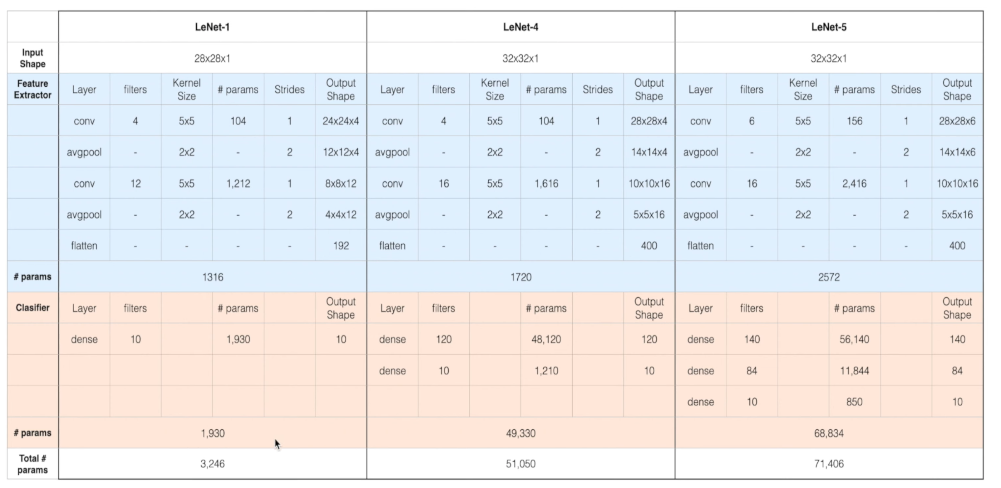

In [5]:
Image("img/LeNet.png")

In [4]:
#Goal: use Sequential and Model to reduce code redundancy

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D
import matplotlib.pyplot as plt
from IPython.display import Image

class LeNet1(Model):
    def __init__(self):
        super(LeNet1, self).__init__()
        
        #feature extractor
        self.conv_1 = Conv2D(filters = 4, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_1_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        self.conv_2 = Conv2D(filters = 12, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_2_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        #classifier
        self.flatten = Flatten()
        self.dense_1 = Dense(units = 10, activation = "softmax")
        
    def call(self,x):
        x = self.conv_1(x)
        x = self.conv_1_pool(x)

        x = self.conv_2(x)
        x = self.conv_2_pool(x)
        
        x = self.flatten(x)
        x = self.dense_1(x)
        return x

In [9]:
class LeNet4(Model):
    def __init__(self):
        super(LeNet4, self).__init__()
        
        #feature extractor
        self.zero_padding = ZeroPadding2D(padding = 2)
        self.conv_1 = Conv2D(filters = 4, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_1_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        self.conv_2 = Conv2D(filters = 16, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_2_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        #classifier
        self.flatten = Flatten()
        self.dense_1 = Dense(units = 120, activation = "tanh")
        self.dense_2 = Dense(units = 10, activation = "softmax")
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.conv_1(x)
        x = self.conv_1_pool(x)

        x = self.conv_2(x)
        x = self.conv_2_pool(x)
        
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        return x

In [10]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        #feature extractor
        self.zero_padding = ZeroPadding2D(padding = 2)
        self.conv_1 = Conv2D(filters = 6, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_1_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        self.conv_2 = Conv2D(filters = 16, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_2_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        #classifier
        self.flatten = Flatten()
        self.dense_2 = Dense(units = 140, activation = "tanh")
        self.dense_2 = Dense(units = 84, activation = "tanh")
        self.dense_3 = Dense(units = 10, activation = "softmax")
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.conv_1(x)
        x = self.conv_1_pool(x)

        x = self.conv_2(x)
        x = self.conv_2_pool(x)
        
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return x

# Hybrid = Model SubClassing + Sequential

In [2]:
%%writefile models.py

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D
import matplotlib.pyplot as plt
from IPython.display import Image

class FeatureExtractor(Layer):
    def __init__(self, filter_1, filter_2):
        super(FeatureExtractor, self).__init__()
        
        #extract filter
        self.conv_1 = Conv2D(filters = filter_1, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_1_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
        self.conv_2 = Conv2D(filters = filter_2, kernel_size = (5,5), 
                             padding = "valid",strides = 1, activation = "tanh") 
        self.conv_2_pool = AveragePooling2D(pool_size = (2,2), padding = "valid", strides = 2)
        
    def call(self,x):
        x = self.conv_1(x)
        x = self.conv_1_pool(x)
        x = self.conv_2(x)
        x = self.conv_2_pool(x)
        return x
    
class LeNet1(Model):
    def __init__(self):
        super(LeNet1, self).__init__()
        
        #feature extractor
        self.fe = FeatureExtractor(4,12)

        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.fe(x)
        x = self.classifier(x)
        return x
    
class LeNet4(Model):
    def __init__(self):
        super(LeNet4, self).__init__()
        
        #feature extractor
        self.zero_padding = ZeroPadding2D(padding=2)
        self.fe = FeatureExtractor(4,16)
        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 120, activation = "tanh"))
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.fe(x)
        x = self.classifier(x)
        return x
    
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        #feature extractor   
        self.zero_padding = ZeroPadding2D(padding=2)
        self.fe = FeatureExtractor(6,16)
        
        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 140, activation = "tanh"))
        self.classifier.add(Dense(units = 84, activation = "softmax"))
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.fe(x)
        x = self.classifier(x)
        return x

Writing models.py


In [ ]:
class LeNet1(Model):
    def __init__(self):
        super(LeNet1, self).__init__()
        
        #feature extractor
        self.fe = FeatureExtractor(4,12)

        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.fe(x)
        x = self.classifier(x)
        return x

In [ ]:
class LeNet4(Model):
    def __init__(self):
        super(LeNet4, self).__init__()
        
        #feature extractor
        self.zero_padding = ZeroPadding2D(padding=2)
        self.fe = FeatureExtractor(4,16)
        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 120, activation = "tanh"))
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.fe(x)
        x = self.classifier(x)
        return x

In [ ]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        #feature extractor   
        self.zero_padding = ZeroPadding2D(padding=2)
        self.fe = FeatureExtractor(6,16)
        
        #classifier
        self.classifier = Sequential()
        self.classifier.add(Flatten())
        self.classifier.add(Dense(units = 140, activation = "tanh"))
        self.classifier.add(Dense(units = 84, activation = "softmax"))
        self.classifier.add(Dense(units = 10, activation = "softmax"))
        
    def call(self,x):
        x = self.zero_padding(x)
        x = self.fe(x)
        x = self.classifier(x)
        return x

In [4]:
import os 

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

from utils.lear